# Оформление
Можно выбрать между ячейкой первой и второй, то есть между уже заданными условиями и выбираемыми.

In [1]:
import numpy as np
matrix = np.array([[1, -5, -7, 1], [1, -3, -9, -4], [-2, 4, 2, 1], [-9, 9, 5, 3]])
b = [-75, -41, 18, 29]
n = 4

In [2]:
# import numpy as np
# n = int(input('Введите размерность матрицы: '))

# matrix = []
# for i in range(n):
#     matrix.append(input('Опишите ' + str(i + 1) + '-ую' + ' строку через пробел: ').split())
    
# b = input('Опишите ' + 'столбец B через пробел: ').split()

## Решение задачи методом Гаусса, определитель, обратная матрица
описание используемых функций при решении задачи

In [3]:
# перевод значений матрицы в тип данных float
def floating_a(mrx):

    m = []
    for i in mrx:
        temp = []
        for j in i:
            temp.append(float(j))
        m.append(temp)
    np.array(m)
    
    return np.array(m)
# good working

In [4]:
# перевод значений вектора значений в тип данных float
def floating_b(m):
    b = []
    for i in m:
        b.append(float(i))
    return np.array(b)
# good working

In [5]:
# formula for new a
def k_a(a_ij, a_il, a_ll, a_lj):
# l - level, phase    
    a_p_ij = a_ij - ((a_il / a_ll)*a_lj)
    return a_p_ij
# В сравнении с ручным счетом работает стабильно

In [6]:
# formula for new b
def k_b(b_i, a_il, a_ll, b_l):
    b = b_i - (a_il / a_ll)*b_l
    return b
# В сравнении с ручным счетом работает стабильно

In [7]:
# copy of matrix
def copy_m(matrix):
    m_copy = []
    for i in matrix:
        t = []
        for f in i:
            t.append(f)
        m_copy.append(t)
    return m_copy
# В сравнении с ручным счетом работает стабильно

In [8]:
# copy of b-vector
def copy_b(b):
    b_copy = []
    for i in b:
        b_copy.append(i)
    return b_copy
# В сравнении с ручным счетом работает стабильно

In [9]:
# straight course
def gauss(matrix, b):
    
    matrix = floating_a(matrix) 
    b = floating_b(b)
    a = []
    for k in range(n - 1):
        
        m_copy = copy_m(matrix)

        b_copy = copy_b(b)

        for level in range(k + 1, n):
            a.append(m_copy[level][k])
            
            for elem in range(n):
                if elem <= k:
                    matrix[level][elem] = 0
                else:
                    matrix[level][elem] = k_a(m_copy[level][elem],
                                              a[-1],
                                              m_copy[k][k],
                                              m_copy[k][elem])
            
            b[level] = k_b(b_copy[level],
                          a[-1],
                          m_copy[k][k],
                          b_copy[k])
        print(k + 1, 'итерация')
        print(matrix, b)
        
        
    return matrix, b
# В сравнении с ручным счетом работает стабильно

In [10]:
# determinate
def det(matrix):
    det_a = 1.
    for i in range(len(matrix)):
        det_a *= matrix[i][i]
    return det_a

In [11]:
# reverse course
def solve(matrix, b):
    x = b[n - 1] / matrix[n - 1][n - 1]
    answer = [0] * n
    answer[n - 1] = x
    for k in range(n - 2, 0,  -1):
        summ = 0
        for i in range(len(answer) - 1, 0, -1):
            if answer[i] != 0:
                summ += answer[i] * matrix[k][i]
            else: break
        
        answer[k] = (b[k] - summ) / matrix[k][k]
    
    summ = 0
    for i in range(len(answer) - 1, 0, -1):
        if answer[i] != 0:
            summ += answer[i] * matrix[0][i]
        else: break
            
    answer[0] = (b[0] - summ) / matrix[0][0]
    return answer

In [12]:
# ones_matrix
def create_e(n):
    E = [[0] * n for i in range(n)]
    for i in range(n):
        E[i][i] = 1
    return np.array(E)

In [13]:
# description about getting reverse matrix
def reverse_matrix(matrix, e):
    r_matrix = []
    for i in range(n):
        r_matrix.append(solve(gauss(matrix, b)[0], gauss(matrix, e[i])[1]))
    return np.array(r_matrix)

### Воспроизведение кода с целью получения ответов

**_Дисклеймер_**
В тексте даны указания, необходимые для пояснительных записей к решению. Все последовательно подается.
Ниже дано фото теории
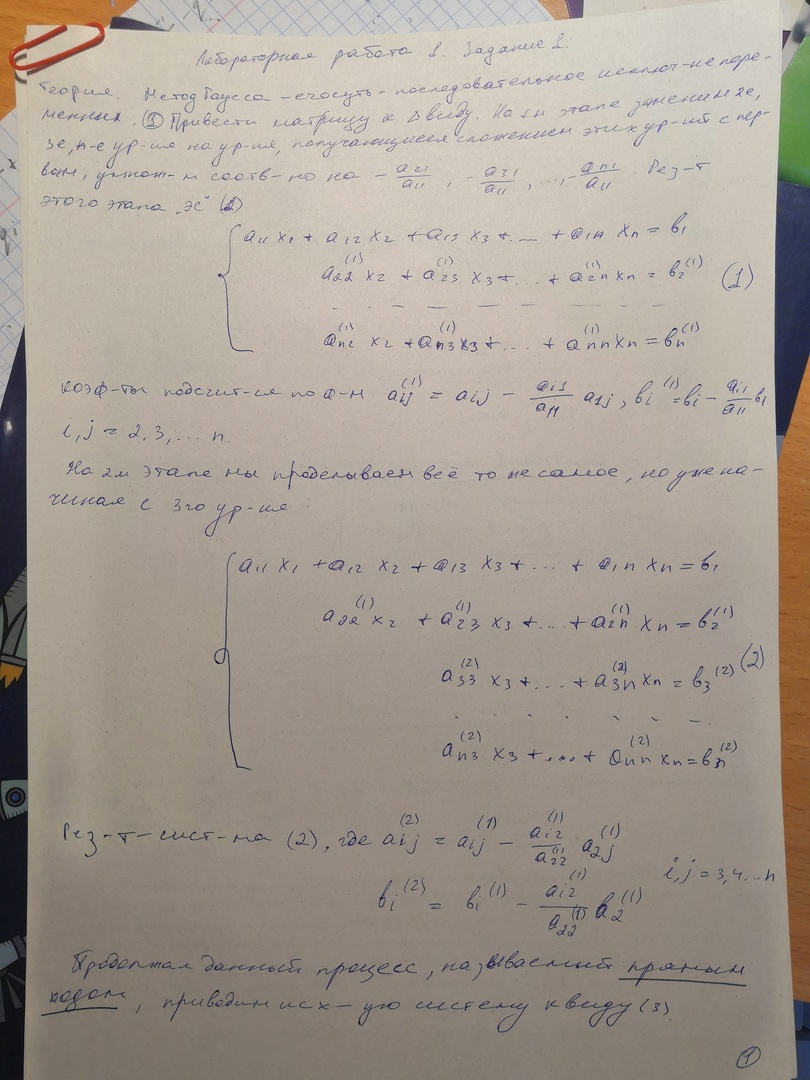
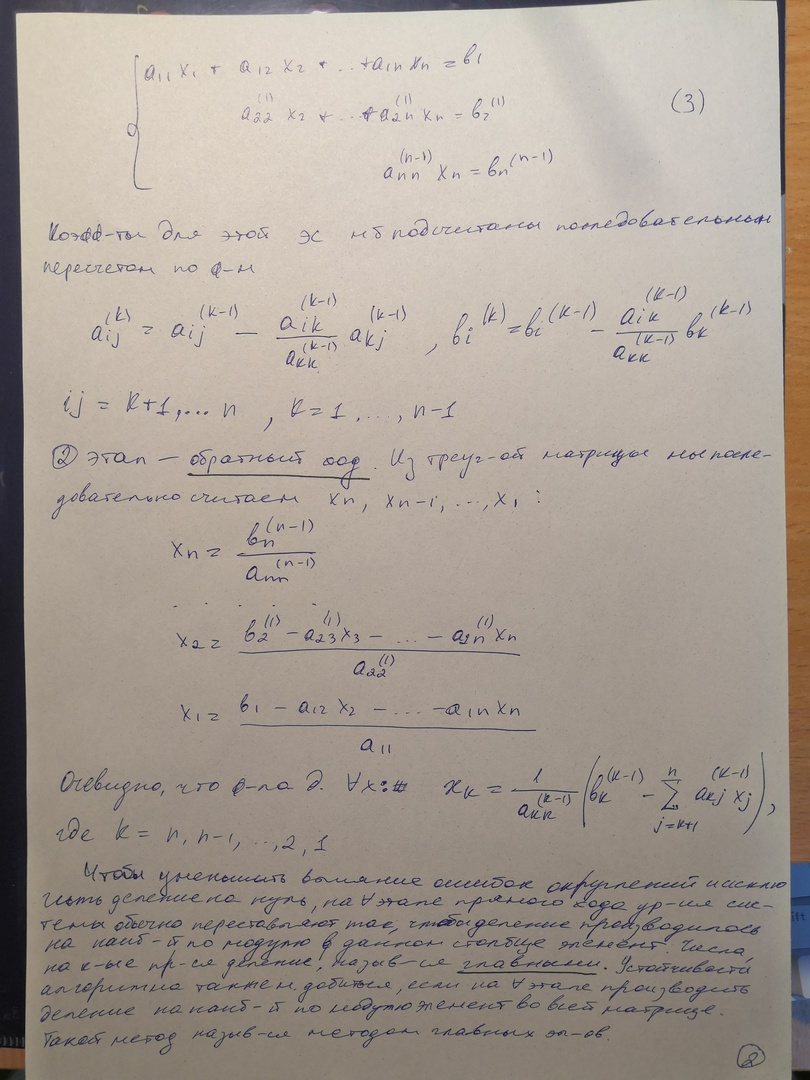
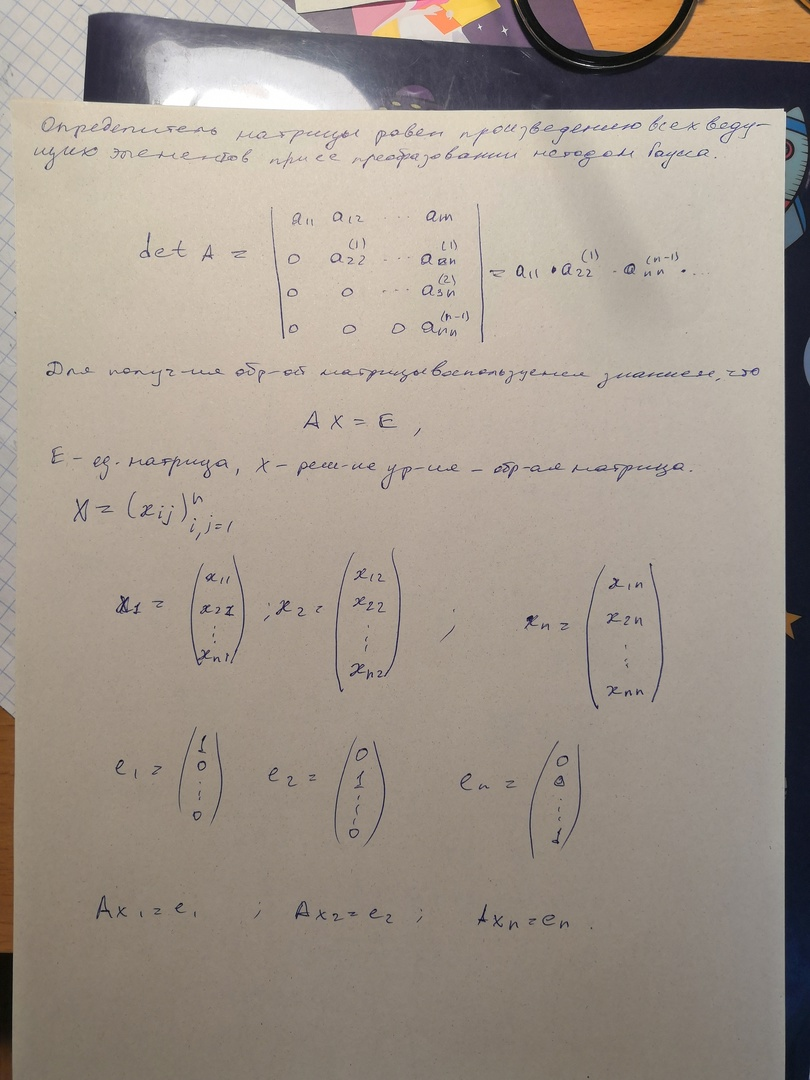

Перепишите задание и свой вариант:

1.1.  Применить метод Гаусса (с выбором главного элемента) к решению системы линейных алгебраических уравнений (СЛАУ). Для матрицы СЛАУ вычислить определитель и обратную матрицу. 

Первое, что мы делаем, это записываем матрицу и вектор СЛАУ.

In [14]:
matrix, b

(array([[ 1, -5, -7,  1],
        [ 1, -3, -9, -4],
        [-2,  4,  2,  1],
        [-9,  9,  5,  3]]),
 [-75, -41, 18, 29])

Далее используется прямой ход.

Прямой ход.

Пояснение: первая скобка - матрица на шаге k, k = 1,2,3; вторая - вектор b на шаге k, k = 1,2,3 - все так же, как и на пункте выше

Переписать только то, что помечено итерацией.

In [15]:
gauss(matrix, b)

1 итерация
[[  1.  -5.  -7.   1.]
 [  0.   2.  -2.  -5.]
 [  0.  -6. -12.   3.]
 [  0. -36. -58.  12.]] [ -75.   34. -132. -646.]
2 итерация
[[  1.  -5.  -7.   1.]
 [  0.   2.  -2.  -5.]
 [  0.   0. -18. -12.]
 [  0.   0. -94. -78.]] [-75.  34. -30. -34.]
3 итерация
[[  1.          -5.          -7.           1.        ]
 [  0.           2.          -2.          -5.        ]
 [  0.           0.         -18.         -12.        ]
 [  0.           0.           0.         -15.33333333]] [-75.          34.         -30.         122.66666667]


(array([[  1.        ,  -5.        ,  -7.        ,   1.        ],
        [  0.        ,   2.        ,  -2.        ,  -5.        ],
        [  0.        ,   0.        , -18.        , -12.        ],
        [  0.        ,   0.        ,   0.        , -15.33333333]]),
 array([-75.        ,  34.        , -30.        , 122.66666667]))

In [16]:
# straight course
def gauss(matrix, b):
    
    matrix = floating_a(matrix) 
    b = floating_b(b)
    a = []
    for k in range(n - 1):
        
        m_copy = copy_m(matrix)

        b_copy = copy_b(b)

        for level in range(k + 1, n):
            a.append(m_copy[level][k])
            
            for elem in range(n):
                if elem <= k:
                    matrix[level][elem] = 0
                else:
                    matrix[level][elem] = k_a(m_copy[level][elem],
                                              a[-1],
                                              m_copy[k][k],
                                              m_copy[k][elem])
            
            b[level] = k_b(b_copy[level],
                          a[-1],
                          m_copy[k][k],
                          b_copy[k])        
        
    return matrix, b
# В сравнении с ручным счетом работает стабильно

Далее обратный ход. Последовательно вычисляются Xn, Xn-1, ..., x1

In [17]:
# values of variables x1, x2, ... xn
print('Решение уравнения: x1, x2, ... xn =',solve(gauss(matrix, b)[0], gauss(matrix, b)[1]))

Решение уравнения: x1, x2, ... xn = [2.0, 3.9999999999999982, 7.000000000000002, -8.000000000000002]


Теперь считаем определитель.

In [18]:
# determinate of matrix
print('Определитель', det(gauss(matrix, b)[0]))

Определитель 551.9999999999998


В заключение, исчисляем обратную матрицу к исходной

In [19]:
# we get reverse matrix
print(reverse_matrix(matrix, create_e(n)).T)

[[ 0.02898551 -0.0326087   0.52536232 -0.22826087]
 [ 0.00724638  0.05434783  0.56884058 -0.11956522]
 [-0.10869565 -0.06521739 -0.2826087   0.04347826]
 [ 0.24637681 -0.15217391  0.34057971 -0.06521739]]
